1. Importação de bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

2. Carregamento da base de dados (histórico de projetos)

In [4]:
df = pd.read_csv('../data/historico_projetos.csv')
df.head()

,id_usuario,nome_usuario,projeto_id,orcamento,duracao,sucesso,data_inicio
0,1,Usuário 1,1_1,18568,12,1,2020-09-09
1,1,Usuário 1,1_2,9666,10,1,2021-11-30
2,1,Usuário 1,1_3,1189,15,1,2022-05-25
3,1,Usuário 1,1_4,2267,3,0,2021-10-08
4,1,Usuário 1,1_5,15502,18,0,2020-11-11


3. Verificação geral da base de histórico de projetos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_usuario    353 non-null    int64 
 1   nome_usuario  353 non-null    object
 2   projeto_id    353 non-null    object
 3   orcamento     353 non-null    int64 
 4   duracao       353 non-null    int64 
 5   sucesso       353 non-null    int64 
 6   data_inicio   353 non-null    object
dtypes: int64(4), object(3)
memory usage: 19.4+ KB


4. Estatísticas descritivas da base de histórico de projetos

In [9]:
df.drop(columns=['id_usuario']).describe()

,orcamento,duracao,sucesso
count,353.000000,353.000000,353.000000
mean,10073.000000,12.116147,0.705382
std,5504.837606,6.674289,0.456518
min,1009.000000,1.000000,0.000000
25%,5544.000000,6.000000,0.000000
50%,9392.000000,12.000000,1.000000
75%,14568.000000,18.000000,1.000000
max,19944.000000,23.000000,1.000000


5. Distribuição da variável alvo (sucesso) na base de histórico de projetos

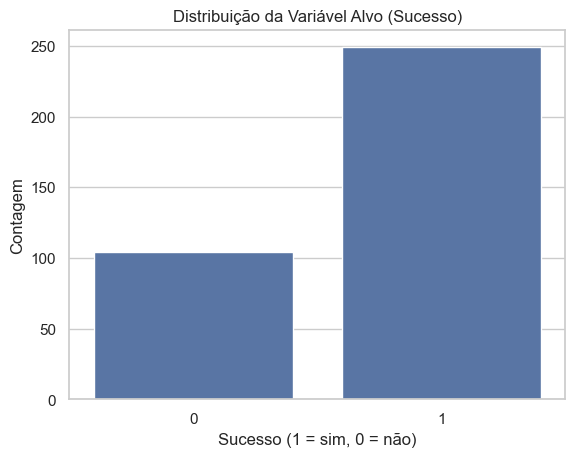

In [10]:
sns.countplot(x='sucesso', data=df)
plt.title('Distribuição da Variável Alvo (Sucesso)')
plt.xlabel('Sucesso (1 = sim, 0 = não)')
plt.ylabel('Contagem')
plt.show()

6. Correlação entre variáveis numéricas da base de histórico de projetos

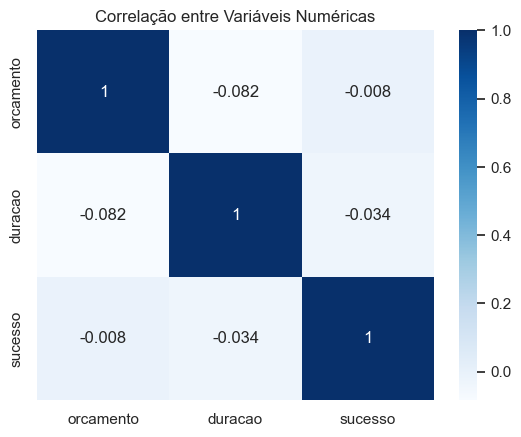

In [12]:
# Exclui 'id_usuario' do cálculo de correlação
corr = df.drop(columns=['id_usuario']).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

7. Conversão de variáveis categóricas relevantes (se houver)

In [15]:
# Exemplo: se houver coluna 'nome_usuario', converter para categoria
if 'nome_usuario' in df.columns:
    df['nome_usuario'] = df['nome_usuario'].astype('category')
df.head()

,id_usuario,nome_usuario,projeto_id,orcamento,duracao,sucesso,data_inicio
0,1,Usuário 1,1_1,18568,12,1,2020-09-09
1,1,Usuário 1,1_2,9666,10,1,2021-11-30
2,1,Usuário 1,1_3,1189,15,1,2022-05-25
3,1,Usuário 1,1_4,2267,3,0,2021-10-08
4,1,Usuário 1,1_5,15502,18,0,2020-11-11


8. Visualização combinada (pairplot) de variáveis relevantes da base de histórico de projetos

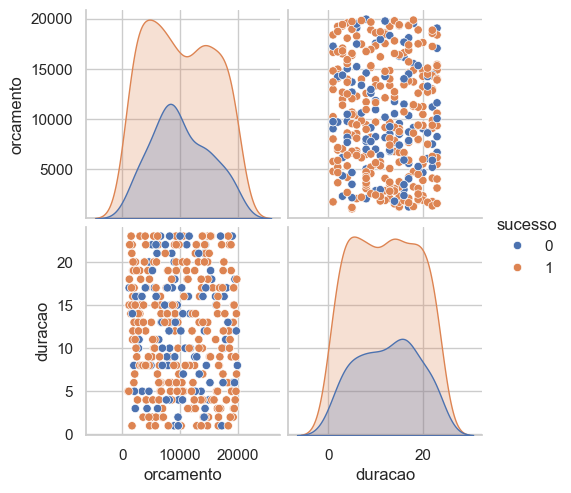

In [16]:
sns.pairplot(df, hue='sucesso', vars=['orcamento', 'duracao'])
plt.show()